In [1]:
from itertools import product
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from scipy.stats import norm
from scipy.ndimage.morphology import binary_fill_holes
from skimage.filters import threshold_isodata
from skimage.io import imread
from skimage.measure import regionprops, label
from skimage.morphology import remove_small_objects
from skimage.segmentation import clear_border
from sys import platform

import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as stats
import warnings

In [2]:
default_fontsize = 15

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
import desiqueira2017 as ds

In [29]:
def clear_lr_borders(image):
    """
    """

    aux = np.pad(image, ([1, 1], [0, 0]), mode='constant')
    aux = clear_border(aux)
    
    return aux[:-2, 1:]


def clear_ud_borders(image):
    """
    """

    aux = np.pad(image, ([0, 0], [1, 1]), mode='constant')
    aux = clear_border(aux)
    
    return aux[:-2, 1:]


def clear_ru_borders(image):
    """
    """

    aux = np.pad(image, ([0, 1], [1, 0]), mode='constant')
    aux = clear_border(aux)
    
    return aux[:-2, 1:]


def clear_rd_borders(image):
    """
    """

    aux = np.pad(image, ([1, 0], [1, 0]), mode='constant')
    aux = clear_border(aux)
    
    return aux[:-2, 1:]


def clear_ld_borders(image):
    """
    """

    aux = np.pad(image, ([1, 0], [0, 1]), mode='constant')
    aux = clear_border(aux)
    
    return aux[:-2, 1:]

def clear_lu_borders(image):
    """
    """

    aux = np.pad(image, ([1, 0], [0, 1]), mode='constant')
    aux = clear_border(aux)
    
    return aux[:-2, 1:]

In [45]:
image = imread('orig_figures/dataset_01/Kr-78_4,5min/K90_incid/K90_incid4,5min_3.bmp', as_grey=True)
# image = imread('/home/jaguar/water_coins.jpg', as_grey=True)
img_bin = binary_fill_holes(image < threshold_isodata(image))

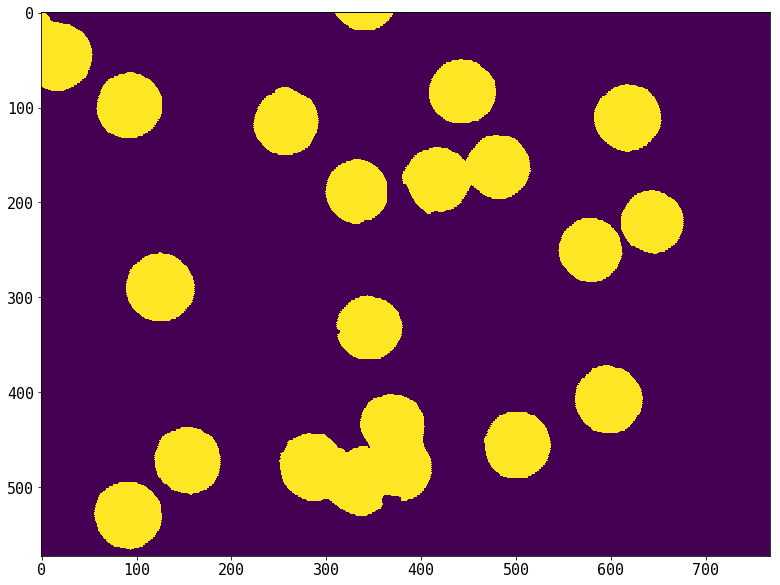

In [46]:
img_borders = clear_rd_borders(img_bin)

#aux = np.pad(img_bin, ([1, 0], [1, 1]), mode='constant')
#aux = clear_border(aux)
#img_borders = aux[:-2, 1:][::-1]

plt.figure(figsize=(15, 10))
plt.imshow(img_borders)

In [56]:
img_labels, num_objects, _ = ds.segmentation_wusem(img_borders, initial_radius=10, delta_radius=5)
img_number = ds.enumerate_objects(image, img_labels, font_size=25)

20


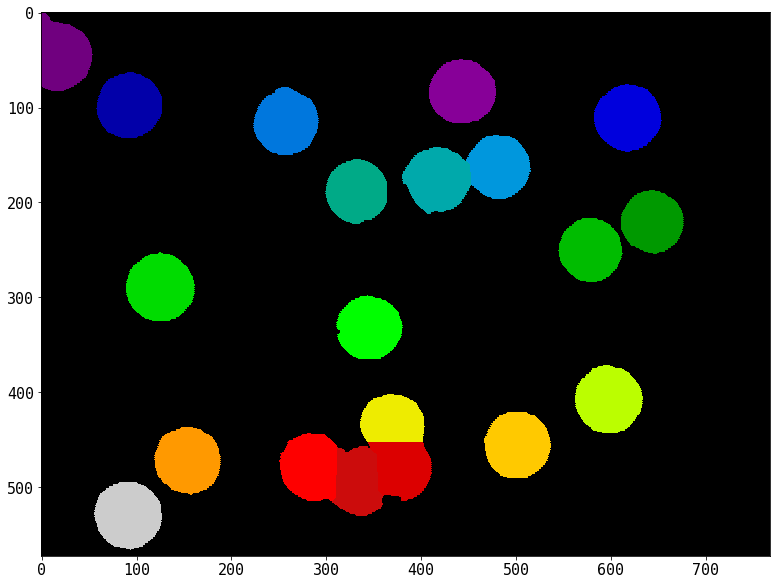

In [57]:
plt.figure(figsize=(15, 10))
plt.imshow(img_labels, cmap='nipy_spectral')
print(num_objects)

20


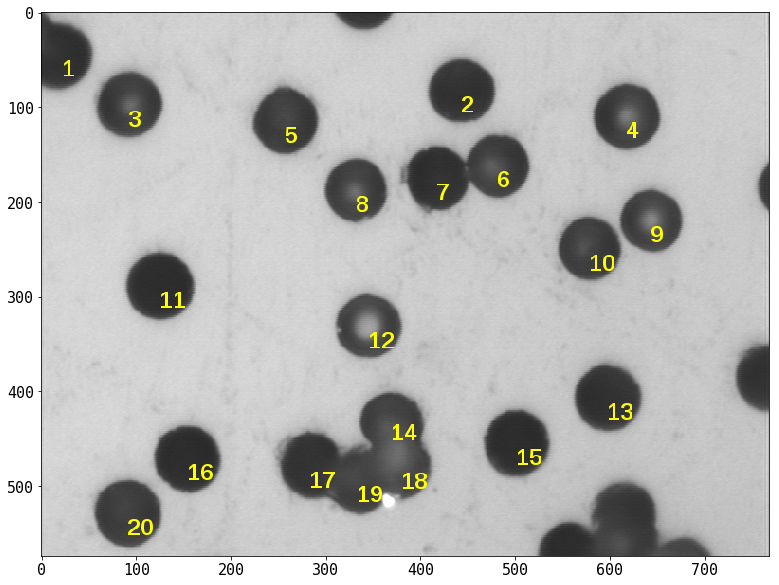

In [58]:
plt.figure(figsize=(15, 10))
plt.imshow(img_number)
print(num_objects)

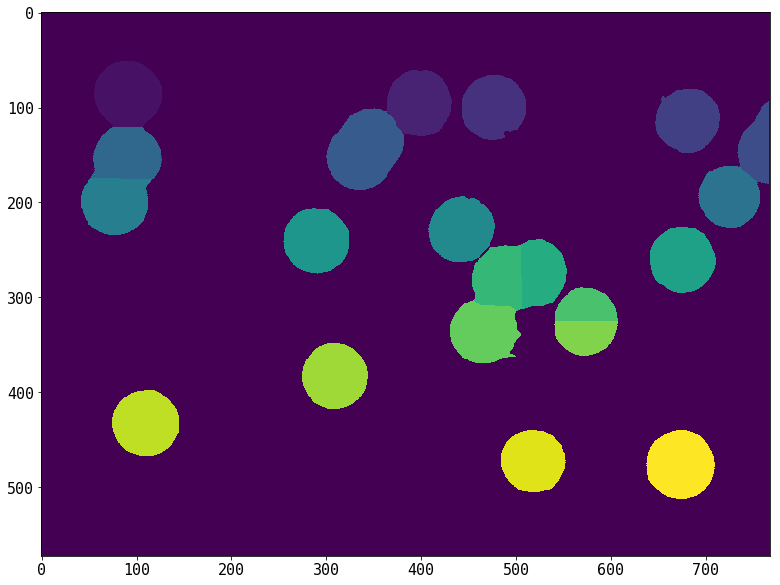

In [66]:
plt.figure(figsize=(15, 10))
plt.imshow(img_labels)

In [19]:
from supmat_support import *

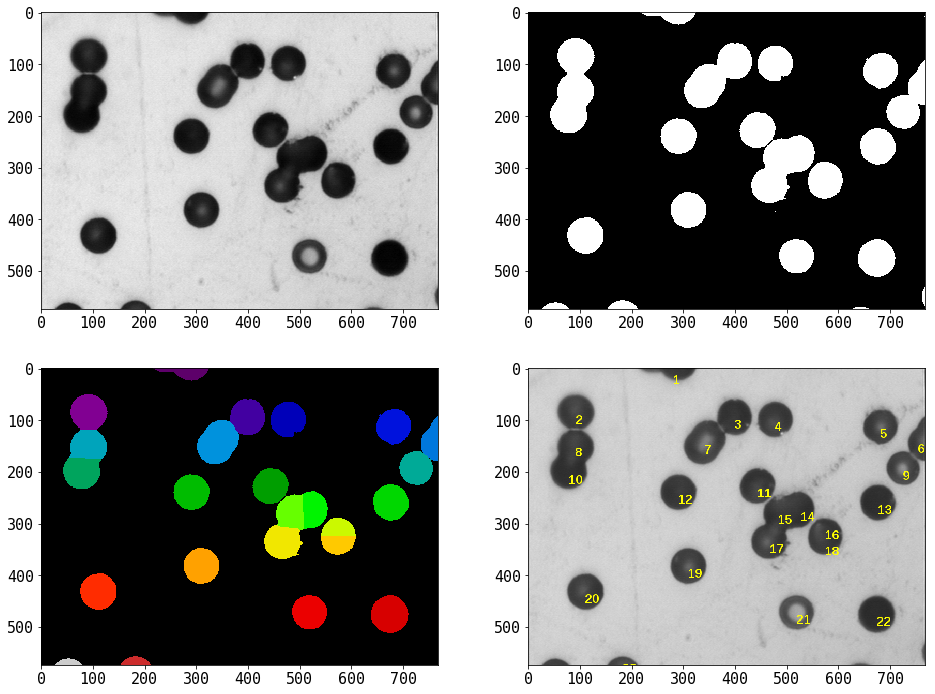

24


In [17]:
image = imread('orig_figures/dataset_01/Kr-78_4,5min/K90_incid/K90_incid4,5min_1.bmp', as_grey=True)
num_objects = wusem_results(image, initial_radius=5, delta_radius=2, count_border=True, save_images=False)
print(num_objects)

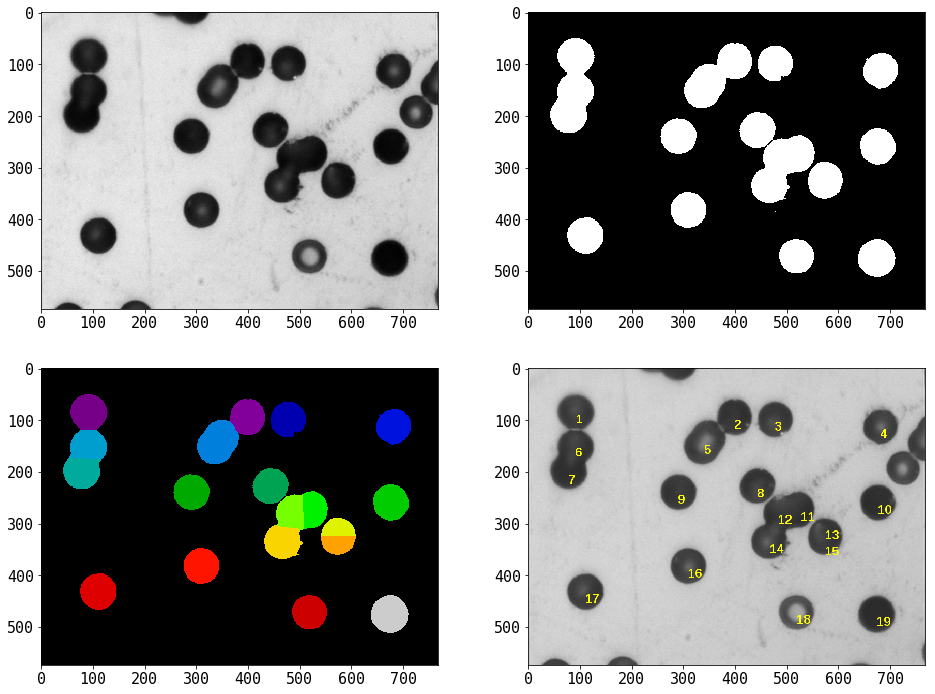

19


In [18]:
image = imread('orig_figures/dataset_01/Kr-78_4,5min/K90_incid/K90_incid4,5min_1.bmp', as_grey=True)
num_objects = wusem_results(image, initial_radius=5, delta_radius=2, count_border=False, save_images=False)
print(num_objects)